# Install Important Libraries

In [1]:
%%capture
!pip install tnkeeh
!pip install farasa

In [2]:
pip install nltk



     ---------------------------------------- 1.5/1.5 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 97.9/97.9 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 274.0/274.0 kB 3.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Important Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tnkeeh as tn
import re
# import arabicstopwords.arabicstopwords as ast

#Load Dataset

In [4]:
table1 = pd.read_csv(r"C:\Users\alabdeen\Desktop\Ai-Book\Advanced NLP\Project_nlp\table1.csv")
table1.head(10)

,id,text
0,1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...
1,1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...
2,1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...
3,1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...
4,1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...
5,877881537122979840,@alibobkr63 او حتى من اي دين او طائفة. اسف ممك...
6,882940840888471552,@muhamed01111 باهي نستنوه. بلكي مشغول ولا حاجة
7,882941769444466688,@muhamed01111 مهما اختلفنا راه نحنا خوت. والله...
8,882943694906818560,@muhamed01111 بالنسبة ليا انا والله شبعت هم ون...
9,884736569118261248,@Ajo32asLibya @Jed_ly مو نحنا الحياة عندنا مية...


In [5]:
table2 = pd.read_csv(r"C:\Users\alabdeen\Desktop\Ai-Book\Advanced NLP\Project_nlp\table2.csv")
table2.head(10)

,id,dialect
0,1009754958479151232,LY
1,1009794751548313600,LY
2,1019989115490787200,LY
3,1035479791758135168,LY
4,1035481122921164800,LY
5,877881537122979840,LY
6,882940840888471552,LY
7,882941769444466688,LY
8,882943694906818560,LY
9,884736569118261248,LY


In [6]:
df = pd.merge(table1,table2,on='id')
df.head()

,id,text,dialect
0,1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...,LY
1,1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...,LY
2,1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...,LY
3,1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...,LY
4,1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...,LY


# **EDA**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147725 entries, 0 to 147724
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       147725 non-null  int64 
 1   text     147725 non-null  object
 2   dialect  147725 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


In [8]:
df.isnull().sum()

id         0
text       0
dialect    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
# LY - Libya
# LB - Lebanon
# EG - Egypt
# SD - sodan
# MA
df['dialect'].value_counts()

dialect
EG    57636
LY    36499
LB    27617
SD    14434
MA    11539
Name: count, dtype: int64

C:\Users\alabdeen\AppData\Local\Temp\ipykernel_10188\3242380544.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dialect', data=df, palette='viridis')


<Axes: xlabel='dialect', ylabel='count'>

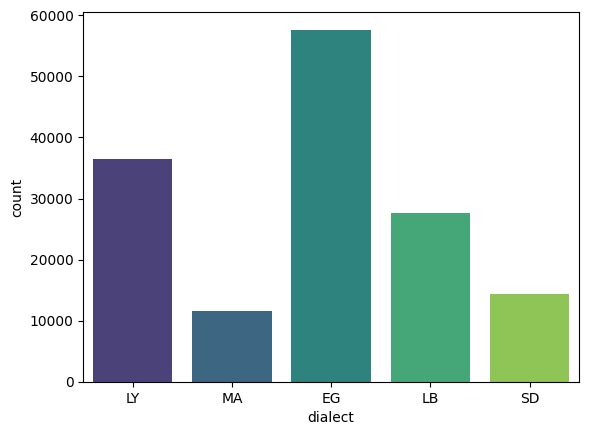

In [11]:
sns.countplot(x='dialect', data=df, palette='viridis')

In [12]:
df.drop(columns=['id'], inplace=True)

In [13]:
df.columns

Index(['text', 'dialect'], dtype='object')

In [14]:
X = df["text"]
y = df["dialect"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (118180,)
Test size: (29545,)


In [15]:
## create dataframe for training data
Train_df = pd.DataFrame({
    'text': X_train,
    'label': y_train
})

In [16]:
## create dataframe for testing data
Test_df = pd.DataFrame({
    'text': X_test,
    'label': y_test
})

# Data Preprocessing

In [17]:
Train_df.head()

,text,label
88782,زهقنا بقى من جو الخُطَب ده \n#القمة_العربية,EG
114230,في روتين بتخاف يضل، وفي روتين بتخاف يفل,LB
41531,@Nuha_islah ههههههه والله فكرني بيغ غي ادومة د...,MA
105644,@msry_o بص زمان ايام البيجو السبع راكب محافظات...,EG
131514,@ali_shoeib1 @MTVLebanonNews ممكن تبعتو رابيد ...,LB


In [18]:
print(Train_df.index)


Index([ 88782, 114230,  41531, 105644, 131514,  98927, 131770,  65258,  91417,
       119771,
       ...
        82324,  76782,    378, 145681,  63770,  13582,  40587,  28088, 106600,
       146172],
      dtype='int64', length=118180)


In [19]:
row = Train_df['text'].loc[136532]
print(row)

هسي انا لو هبشت الورقة بكون فيها طالع نازل ولا بتكون عادية 😅 https://t.co/7YcR5U1gmN


In [20]:
## use Tankeeh
cleander = tn.Tnkeeh(remove_diacritics=True,
                     remove_html_elements=True,
                     remove_twitter_meta=True,
                     remove_links=True,
                     remove_english=True,
                     remove_repeated_chars=True,
                     remove_long_words=True,
                     normalize=True
                     )

In [21]:
Train_df = cleander.clean_data_frame(Train_df,'text')
Test_df = cleander.clean_data_frame(Test_df,'text')


In [25]:
row = Train_df['text'].loc[89133]
print(row)

 # الاخوان المجرمين الخونة الارهابيين الكدابين الفجرة ال بيفطروا على دم الصايمين كانوا ازاى بيحكموا # مصر لك الشكر يا الله على ازاحة هذا البلاء


In [52]:
Train_df.head(2)

,text,label
116153,حبيب القلب ، لا شومان زفتا قرايبيننا ، انا من...,LB
123642,بس يغيرو محل البوز 😂,LB


In [54]:
## remove digits
def remove_digits(df, column_name):
    df[column_name] = df[column_name].replace(r'[0-9٠-٩]', '', regex=True)
    return df
Train_df = remove_digits(Train_df,'text')
Test_df = remove_digits(Test_df,'text')

In [41]:
row = Train_df['text'].loc[89132]
print(row)

  نفسنا نشوف مسؤول مايتغيرش بعد توليه المسؤولية ويفضل على مبادئه الثورجية وأملنا كبير فى أبو عيطة ود  حسام عيسى


In [27]:
def remove_special_characters(text):
    # Replace "؟", "@", "_", and "-" with an empty string
    text = text.replace("؟", "")
    text = text.replace("@", "")
    text = text.replace("_", "")
    text = text.replace("-", "")
    return text

# Apply the function to the 'text' column of Train_df and Test_df
Train_df['text'] = Train_df['text'].apply(remove_special_characters)
Test_df['text'] = Test_df['text'].apply(remove_special_characters)

In [28]:
row = Train_df['text'].loc[89132]
print(row)

  نفسنا نشوف مسؤول مايتغيرش بعد توليه المسؤولية ويفضل على مبادئه الثورجية وأملنا كبير فى أبو عيطة ود . حسام عيسى


In [72]:
import re
def remove_emojis(text):
    # Define the pattern for detecting emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    # Remove emojis from the text
    text_without_emojis = emoji_pattern.sub(r'', text)
    return text_without_emojis

# Apply the function to the 'text' column in Train_df
Train_df['text'] = Train_df['text'].apply(remove_emojis)
Test_df['text'] = Test_df['text'].apply(remove_emojis)


In [29]:
row = Train_df['text'].loc[89132]
print(row)

  نفسنا نشوف مسؤول مايتغيرش بعد توليه المسؤولية ويفضل على مبادئه الثورجية وأملنا كبير فى أبو عيطة ود . حسام عيسى


In [30]:
## remove punctiuation
def remove_arabic_punctuation(text):
    # Define regular expression pattern for Arabic punctuation
    arabic_punctuation_pattern = r'[^\w\s\u0621-\u063A\u0641-\u064A]'
    clean_text = re.sub(arabic_punctuation_pattern,'',text)
    return clean_text
Train_df['text'] = Train_df['text'].apply(remove_arabic_punctuation)
Test_df['text'] = Test_df['text'].apply(remove_arabic_punctuation)

In [32]:
row = Train_df['text'].loc[89132]
print(row)

  نفسنا نشوف مسؤول مايتغيرش بعد توليه المسؤولية ويفضل على مبادئه الثورجية وأملنا كبير فى أبو عيطة ود  حسام عيسى


In [44]:
## Remove spaces from beginning/ middle/ end
def remove_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

Train_df['text'] = Train_df['text'].apply(lambda x: remove_spaces(x))
Test_df['text'] = Test_df['text'].apply(lambda x: remove_spaces(x))

In [45]:
row = Train_df['text'].loc[89132]
print(row)

نفسنا نشوف مسؤول مايتغيرش بعد توليه المسؤولية ويفضل على مبادئه الثورجية وأملنا كبير فى أبو عيطة ود حسام عيسى


In [46]:
Train_df.head(2)

,text,label
88782,زهقنا بقى من جو الخطب ده,EG
114230,في روتين بتخاف يضل وفي روتين بتخاف يفل,LB


In [47]:
Train_df

,text,label
88782,زهقنا بقى من جو الخطب ده,EG
114230,في روتين بتخاف يضل وفي روتين بتخاف يفل,LB
41531,هه والله فكرني بيغ غي ادومة ديالنا مستيلي عليه,MA
105644,بص زمان ايام البيجو السبع راكب محافظات واحد را...,EG
131514,1 ممكن تبعتو رابيد عالحدود مع مصور وتنقلو الي ...,LB
...,...,...
13582,ميسي عليه غسل مواعين الغدا ورونالدو مواعين الع...,LY
40587,اليوم كل اصحابي لي احبهم غايبين عني,MA
28088,الحطب يبي ذهب ويبي 60 وقية حتي البطاطين يشكرو ...,LY
106600,ياريت يكون في دعم تبرع لدفاع المدني كل لازم يس...,LB


In [48]:
Train_df.to_csv(r"C:\Users\alabdeen\Desktop\Ai-Book\Advanced NLP\Project_nlp\preprocessed_train_with_stopwords.csv", index=False)
Test_df.to_csv(r"C:\Users\alabdeen\Desktop\Ai-Book\Advanced NLP\Project_nlp\preprocessed_test_with_stopwords.csv", index=False)
